
**Name:** Samir Srinath  
**Specialization:** CSE Student specializing in AIML

This is just for practicing and learning the model training and its tuning


Accuracy on the test set is 99.69%



In [33]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np



(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()



x_train=x_train/255
x_test=x_test/255

In [34]:


model_A = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Input layer
    keras.layers.Dense(128, activation='relu'),  # First hidden layer
    keras.layers.Dense(64, activation='relu'),   # Second hidden layer
    keras.layers.Dense(32, activation='relu'),   # Third hidden layer
    keras.layers.Dense(10, activation='softmax') # Output layer (for classification)
])

model_A.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Assuming x_train and y_train are already defined
model_A.fit(x_train, y_train, epochs=5)

model_A.compile(
            optimizer='adam',
            loss="SparseCategoricalCrossentropy",
            metrics=['accuracy']
              )
model_A.fit(x_train,y_train,epochs=20)

c:\Users\Samee\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8629 - loss: 0.4642
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9678 - loss: 0.1075
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9778 - loss: 0.0716
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9829 - loss: 0.0535
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9863 - loss: 0.0423
Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9881 - loss: 0.0377
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9893 - loss: 0.0324
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9916 - loss: 0.0250
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9927 - loss: 0.0215
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9934 - loss: 0.0191
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9949 - loss: 0.0159
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step


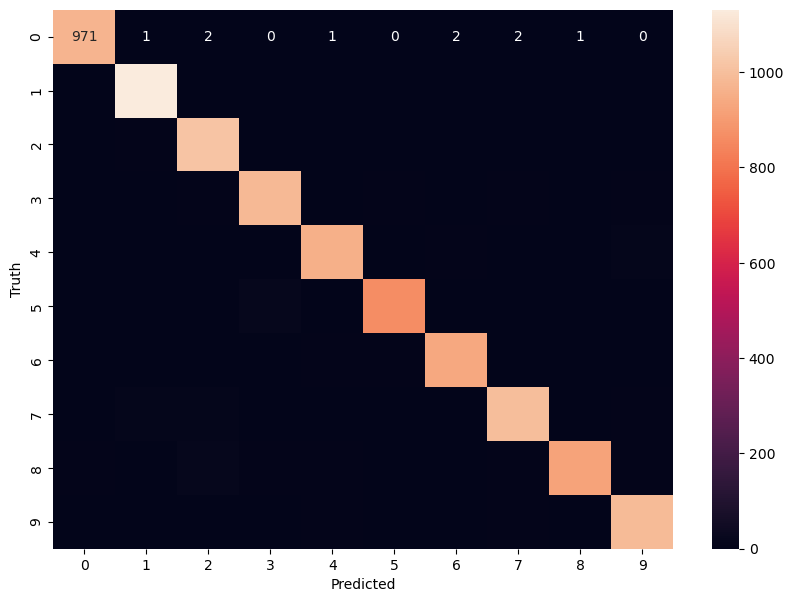

In [35]:
import seaborn as sns
y_predicted=model_A.predict(x_test)
y_predicted_labels= [np.argmax(i) for i in y_predicted]

cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

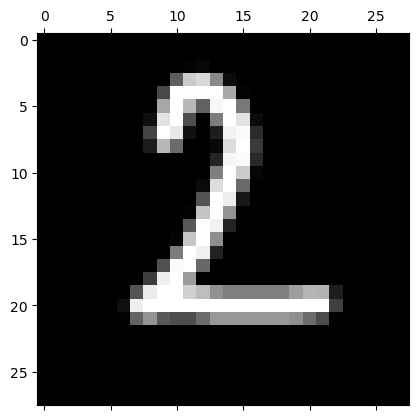

Processed Array Shape: (1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted Digit: 2


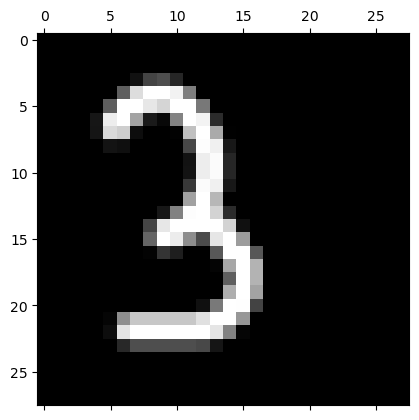

Processed Array Shape: (1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Digit: 3


In [38]:
import numpy as np
import tkinter as tk
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import tensorflow as tf  # Ensure TensorFlow is imported

model = model_A  # Ensure the trained model is used

# Initialize a 28x28 white image
canvas_size = 280  
img = Image.new("L", (canvas_size, canvas_size), 255)  
draw = ImageDraw.Draw(img)

# Initialize Tkinter window
root = tk.Tk()
root.title("Draw a 28x28 Image")

# Create a Canvas
canvas = tk.Canvas(root, width=canvas_size, height=canvas_size, bg="white")
canvas.pack()

def paint(event):
    """Draw on the canvas"""
    x1, y1 = (event.x - 10), (event.y - 10)
    x2, y2 = (event.x + 10), (event.y + 10)
    canvas.create_oval(x1, y1, x2, y2, fill="black", outline="black")
    draw.ellipse([x1, y1, x2, y2], fill="black")

canvas.bind("<B1-Motion>", paint)

def save_and_predict():
    """Convert to 28x28, preprocess, and predict"""
    global img  

    # Convert to 28x28 grayscale
    resized_img = img.resize((28, 28))  
    saved_array = np.array(resized_img, dtype=np.float32)

    # Invert colors: Ensure black (digit) is 255 and background is 0
    saved_array = 255 - saved_array  

    # Normalize: Scale pixel values to [0, 1]
    normalized_array = saved_array / 255.0  

    # Reshape correctly to (1, 28, 28)
    input_data = normalized_array.reshape(1, 28, 28).astype(np.float32)  

    # Visualize image
    plt.matshow(saved_array, cmap="gray")
    plt.show()

    # Debugging: Print shape
    print("Processed Array Shape:", input_data.shape)  

    # Predict using the model
    prediction = model.predict(input_data)
    predicted_digit = np.argmax(prediction)

    # Clear the canvas for a new drawing
    canvas.delete("all")
    draw.rectangle([0, 0, canvas_size, canvas_size], fill="white")

    print("Predicted Digit:", predicted_digit)
    return predicted_digit  

# Add a button to save and predict
button = tk.Button(root, text="Save & Predict", command=save_and_predict)
button.pack()

root.mainloop()
